In [1]:
import sys, os
sys.path.insert(1,'/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages' )
from metatlas import metatlas_objects as metob
f = metob.retrieve('Lcmsruns',username='*')


('Metatlas live in ', '/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages/metatlas')
you're running on cori19 at 128.55.224.49 


In [2]:
import datetime as dt
dt.datetime.now()

datetime.datetime(2017, 4, 12, 11, 48, 53, 995682)

In [3]:
import time
t0 = time.time() - 1.5*365*24*60*60
dt.datetime.fromtimestamp(t0)

datetime.datetime(2015, 10, 12, 23, 48, 54, 542165)

In [4]:
time = []
files = []
for ff in f:
    if ff.acquisition_time:
        if ff.acquisition_time>0:
            time.append(ff.acquisition_time)
            files.append(1)
        else:
            time.append(t0)
            files.append(1)
    else:
        time.append(t0)
        files.append(1)
time = sorted(time)

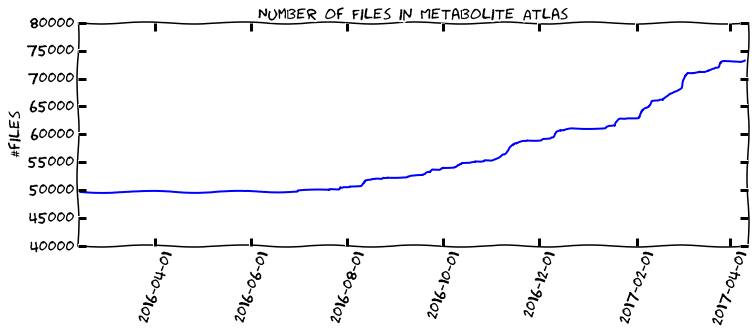

In [14]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.xkcd()
from matplotlib.font_manager import FontProperties
prop = FontProperties(fname='/global/homes/b/bpb/Downloads/Humor-Sans.ttf', size=16)

fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(1, 1, 1)

import datetime as dt
x = [dt.datetime.fromtimestamp(d) for d in time]

plt.plot(x,np.cumsum(files))

import matplotlib.dates as md

xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.yticks(fontproperties=prop)
plt.ylabel('#files',fontproperties=prop)
plt.xticks(rotation=70,fontproperties=prop)
plt.title("Number of Files in Metabolite Atlas",fontproperties=prop)
datenow = dt.datetime.now()
dstart = dt.datetime(datenow.year-1,datenow.month-2,datenow.day)
plt.xlim(dstart, datenow) 
plt.ylim(40000,80000)
plt.show()